In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("alquilereslimpio.csv")
#los inmuebles rebeldes que ponen que se alquilan por 1euro los eliminamos, no es real, te lo ponen para que piques y no te ponen el precio realmente
df.loc[df['precio'] == 1, 'precio'] = np.nan

In [4]:
#vamos a empezar viendo como es la columna
media = df['precio'].mean()
moda = df['precio'].mode()[0]
inmueble_mayor_precio = df.loc[df['precio'].idxmax()]
inmueble_menor_precio = df.loc[df['precio'].idxmin()]

print(f"La media de todos los valores es: {media}")
print(f"El valor que mas se repite en el df es: {moda}\n")
print(f"Inmueble con el mayor precio:\n{inmueble_mayor_precio[['nombre', 'identificador','precio']]}\n")
print(f"Inmueble con el menor precio:\n{inmueble_menor_precio[['nombre', 'identificador','precio']]}\n")
print(f"El df contiene valores con precios desde los {inmueble_menor_precio['precio']} hasta los {inmueble_mayor_precio['precio']}€")

La media de todos los valores es: 1814.1649244060475
El valor que mas se repite en el df es: 1200.0

Inmueble con el mayor precio:
nombre           Chalet en Río Real
identificador    32565614098_109300
precio                      80000.0
Name: 1592, dtype: object

Inmueble con el menor precio:
nombre           Finca rústica en Clarés de Ribota
identificador                   30003388540_100900
precio                                        35.0
Name: 2649, dtype: object

El df contiene valores con precios desde los 35.0 hasta los 80000.0€


In [5]:
#vamos a quitar los nans para ver mejor los datos
df_limpio = df.dropna(subset=['precio'])

In [6]:
#Filtraremos 'precio' según rango intercuantílico
Q1 = df_limpio['precio'].quantile(0.25)
Q2 = df_limpio['precio'].quantile(0.5)
Q3 = df_limpio['precio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite Inferior: {limite_inferior}")
print(f"Límite Superior: {limite_superior}")
#el limite inferior es negativo, pero no significa que haya inmuebles con precios negativos

# Estos son los inmuebles que se quedan fuera por arriba por superar Q3
inmuebles_fuera_arriba = df_limpio[df_limpio['precio'] > limite_superior]
print("Inmuebles que superan Q3 (por arriba en precio):")
print(f"{inmuebles_fuera_arriba[['nombre', 'identificador','precio']]}")
print(f"Para limpiar outliers eliminamos {inmuebles_fuera_arriba.shape[0]} columnas de {df_limpio.shape[0]}\n")
df_limpio = df_limpio[(df_limpio['precio'] >= limite_inferior) & (df_limpio['precio'] <= limite_superior)]

Q1: 800.0
Q3: 2100.0
IQR: 1300.0
Límite Inferior: -1150.0
Límite Superior: 4050.0
Inmuebles que superan Q3 (por arriba en precio):
                                          nombre       identificador   precio
348                    Apartamento en La Barrosa  97597700994_100500   4500.0
349    Casa adosada en Las Lomas de Sancti Petri  44210354830_100500   6000.0
362    Casa adosada en Las Lomas de Sancti Petri  32550652421_100500   5000.0
370                   Casa adosada en La Barrosa  43341956511_100500   5100.0
379                      Chalet en Coto La Campa  24246406708_100500   6500.0
...                                          ...                 ...      ...
11612               Piso en calle de Peñaflorida  40834706785_102200  13000.0
11633                      Apartamento en Centro  50043891174_101800  15000.0
11794                              Piso en Moyua  49234414650_102200   4200.0
11837              Piso en calle de Iparraguirre  49222091886_102200   4400.0
12470      

In [7]:
#Vamos a ver como nos ha quedado la columna despues del filtrado
media = df_limpio['precio'].mean()
moda = df_limpio['precio'].mode()[0]
inmueble_mayor_precio = df_limpio.loc[df_limpio['precio'].idxmax()]
inmueble_menor_precio = df_limpio.loc[df_limpio['precio'].idxmin()]

print(f"Después del filtrado:")
print(f"La media de todos los valores es: {media}")
print(f"El valor que mas se repite en el df es: {moda}\n")
print(f"Inmueble con el mayor precio:\n{inmueble_mayor_precio[['nombre', 'identificador','precio']]}\n")
print(f"Inmueble con el menor precio:\n{inmueble_menor_precio[['nombre', 'identificador','precio']]}\n")
print(f"El df limpio contiene valores con precios desde los {inmueble_menor_precio['precio']} hasta los {inmueble_mayor_precio['precio']}€")

La media de todos los valores es: 1430.2624480369516
El valor que mas se repite en el df es: 1200.0

Inmueble con el mayor precio:
nombre           Casa adosada en Puntal
identificador        44203838062_106000
precio                           4050.0
Name: 2864, dtype: object

Inmueble con el menor precio:
nombre           Finca rústica en Clarés de Ribota
identificador                   30003388540_100900
precio                                        35.0
Name: 2649, dtype: object

El df limpio contiene valores con precios desde los 35.0 hasta los 4050.0€


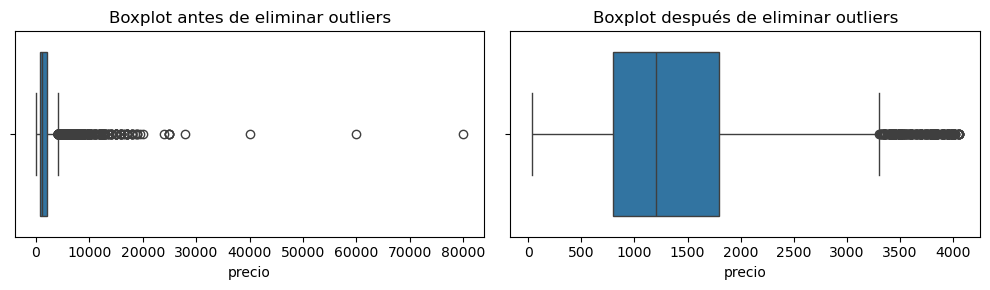

In [8]:
#Visualizamos los datos antes y despues
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['precio'])
plt.title('Boxplot antes de eliminar outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['precio'])
plt.title('Boxplot después de eliminar outliers')

plt.tight_layout()
plt.show()

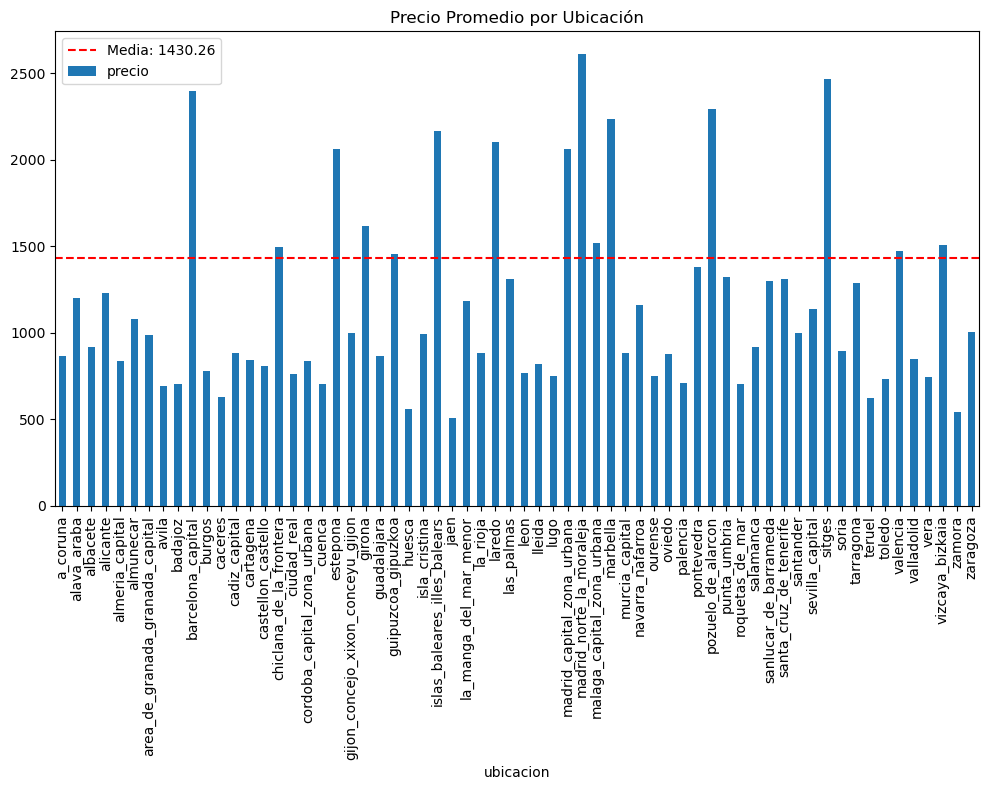

In [9]:
#Visualizamos los datos del precio, según la zona, se pueden dar a entender ciertas cosas
precio_por_ubicacion = df_limpio.groupby('ubicacion')['precio'].mean()
media_precio = df_limpio['precio'].mean()

fig, ax = plt.subplots(figsize=(10, 8)) 
precio_por_ubicacion.plot(kind='bar', ax=ax)

ax.axhline(media_precio, color='r', linestyle='--', label=f'Media: {media_precio:.2f}')

plt.xticks(rotation=90)
plt.title('Precio Promedio por Ubicación')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
print("Conclusiones:")
print("Se puede apreciar que las ciudades mas grandes tienen mayor media de precios, pero todavía mas algunas poblaciones cercanas a estas ciudades que se suelen relacionar con un nivel adquisitivo alto, como la moraleja, sitges o marbella")

Conclusiones:
Se puede apreciar que las ciudades mas grandes tienen mayor media de precios, pero todavía mas algunas poblaciones cercanas a estas ciudades que se suelen relacionar con un nivel adquisitivo alto, como la moraleja, sitges o marbella
